In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

class LSM_Solver:
    def __init__(self, power):
        self.m = power
        self.coeff = np.zeros(self.m + 1)

    def fit(self, x, y):
        n = x.size

        matrixPhi = np.ones((n, self.m + 1))
        for i in range(1, self.m + 1):
            matrixPhi[:, i] = np.power(x, i)

        matrixLambda = matrixPhi.T.dot(matrixPhi)
        beta = matrixPhi.T.dot(y)

        self.coeff = np.flip(linalg.solve(matrixLambda, beta), 0)

    def predict(self, x):
        return np.polyval(self.coeff, x)

In [37]:
def f(x):
    return np.sin(x) * np.sin(x)

def mse(Y_true, Y_pred):
    return ((np.square(Y_true - Y_pred)).mean(axis=0)) ** 0.5

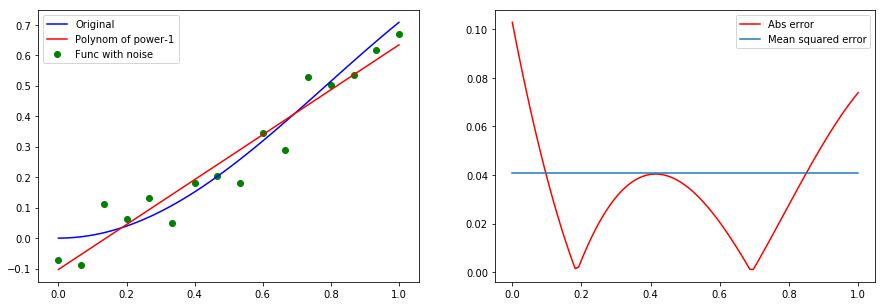

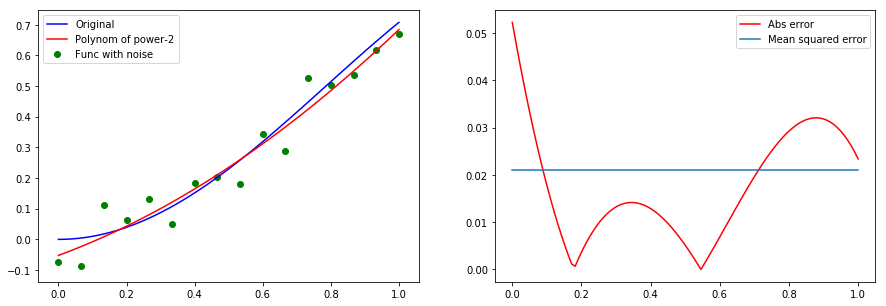

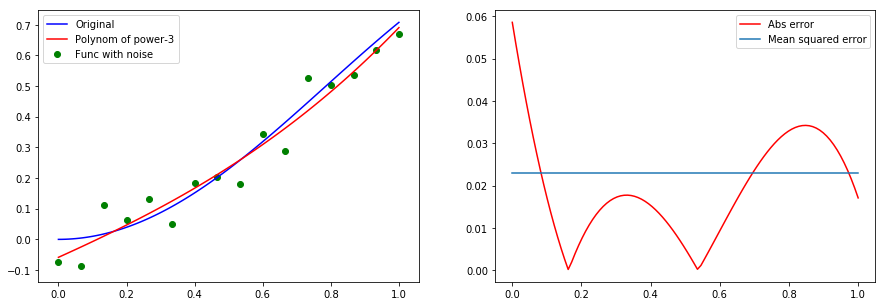

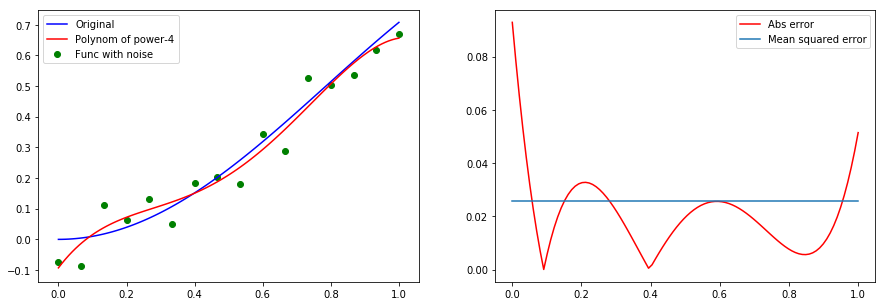

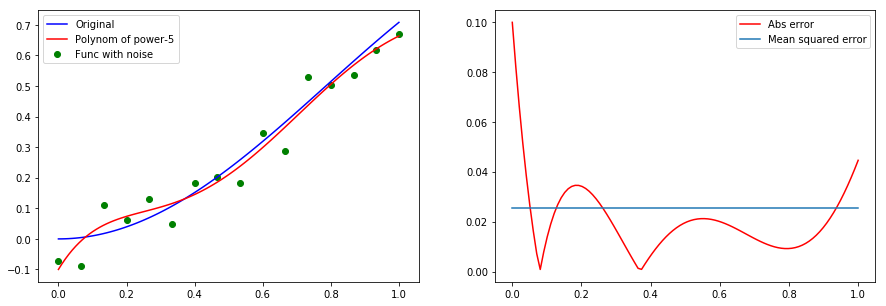

In [61]:
x_train = np.linspace(0, 1, 16)

noise = np.random.uniform(-0.1, 0.1, x_train.size)
y_train = f(x_train) + noise

powers = np.array([1, 2, 3, 4, 5])
x_test = np.linspace(0, 1, 100)

for i, m in enumerate(powers):
    solver = LSM_Solver(m)
    solver.fit(x_train, y_train)
    
    y_true = f(x_test)
    y_pred = solver.predict(x_test)
    
    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    
    noised_orig = ax[0].scatter(x_train, y_train, color='green', label='Func with noise') 
    orig, = ax[0].plot(x_test, y_true, color='blue', label='Original')
    regression, = ax[0].plot(x_test, y_pred, color='red', label='Polynom of power-{}'.format(m))
    ax[0].legend(handles=[orig, regression, noised_orig])
    
    error, = ax[1].plot(x_test, np.abs(y_true - y_pred), color='red', label='Abs error')    
    mean_error, = ax[1].plot(x_test, np.full(x_test.size, mse(y_true, y_pred)), label='Mean squared error')
    ax[1].legend(handles=[error, mean_error])
    
    plt.show()
